In [78]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [79]:
data = pd.read_csv('./train.csv')
not_x = ['PRODUCT_ID', 'Y_Class', 'TIMESTAMP', 'LINE', 'Y_Quality', 'PRODUCT_CODE']

data = data.drop(columns = not_x) # 'X_OO'인 열들만 남기기 -> NaN값 처리 위함.
print(data)
data = data.isnull().sum()
data = data.to_frame()
data.columns=['zero']
data['zero']
# data = data[data['zero']<598] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
data = data[data['zero']<550] 
# data = data[data['zero']<540] 

data # 2875 -> 2793

      X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...  X_2866  \
0     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   39.34   
1     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   38.89   
2     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   39.19   
3     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   37.74   
4     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   38.70   
..    ...   ...  ...   ...   ...  ...   ...   ...   ...   ...  ...     ...   
593  2.00 95.00 0.00 45.00 10.00 0.00 50.00 10.00 52.00  2.00  ...     NaN   
594   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   49.47   
595   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...     NaN   
596 40.00 94.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...     NaN   
597 21.00 87.00 0.00 45.00 10.00 0.00 61.00 10.00 52.00  2.00  ...     NaN   

     X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  X_2873  X_

,zero
X_1,249
X_2,249
X_3,249
X_4,249
X_5,249
...,...
X_2867,498
X_2868,498
X_2869,498
X_2870,498


In [80]:
pd.set_option('display.max_rows', 20)

first_row = data.index.to_list()


In [81]:
# first_row.append('PRODUCT_ID')
first_row.append('Y_Class')
first_row.append('Y_Quality')
# first_row.append('TIMESTAMP')
# first_row.append('LINE')
# first_row.append('PRODUCT_CODE')

data = pd.read_csv('./train.csv')
df = data[first_row]
# df = data.drop(columns = first_row)
print(df)

      X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...  X_2864  \
0     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  368.30   
1     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.74   
2     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.32   
3     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  369.19   
4     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.35   
..    ...   ...  ...   ...   ...  ...   ...   ...   ...   ...  ...     ...   
593  2.00 95.00 0.00 45.00 10.00 0.00 50.00 10.00 52.00  2.00  ...     NaN   
594   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  369.81   
595   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.02   
596 40.00 94.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...     NaN   
597 21.00 87.00 0.00 45.00 10.00 0.00 61.00 10.00 52.00  2.00  ...     NaN   

     X_2865  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  Y_

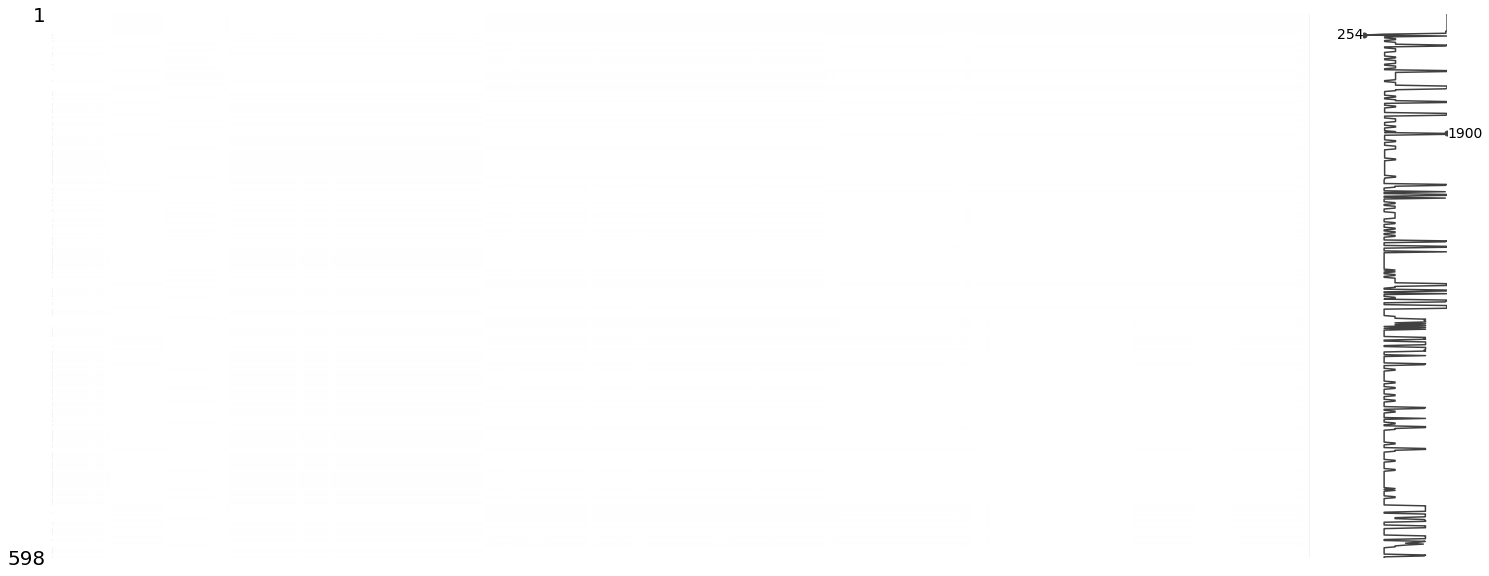

In [ ]:
# 결측된 데이터 시각화 -> 결측된 데이터는 흰색으로, 그렇지 않은 데이터는 검은색으로
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [82]:
# # 데이터가 절반 이상이 없는 열을 삭제
# df = df.dropna(thresh=int(len(df) * 0.5), axis=1)
# msno.matrix(df)
# plt.show()
!pip install impyute
print(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
      X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...  X_2864  \
0     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  368.30   
1     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.74   
2     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.32   
3     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  369.19   
4     NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.35   
..    ...   ...  ...   ...   ...  ...   ...   ...   ...   ...  ...     ...   
593  2.00 95.00 0.00 45.00 10.00 0.00 50.00 10.00 52.00  2.00  ...     NaN   
594   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  369.81   
595   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...  367.02   
596 40.00 94.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...     NaN   
597 21.00 87.00 0.00 45.00 10.00 0.00 61.00

In [84]:
# 중앙값으로 결측값 대체
# from sklearn.impute import SimpleImputer
# from impyute.imputation.cs import fast_knn
# import sys

# sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# # start the KNN training
# imputed_training=fast_knn(df.values, k=5)

# # imputer = SimpleImputer(strategy="mean")
# # # imputer = SimpleImputer(strategy="median")
# # # imputer = SimpleImputer(strategy = 'constant', fill_value=0)
# # df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# # df



from sklearn.impute import KNNImputer

#임퓨터 선언(5개의 평균으로 계산하겠다)
imputer=KNNImputer(n_neighbors=5)

#임퓨터를 사용하여 filled_train으로 저장 이후 같은 임퓨터를 사용할때는 imputer.transform()으로 사용하면됨
filled_train=imputer.fit_transform(df)

#사용하면 array값으로 나오기때문에 dataframe으로 바꿔주고 컬럼을가져옴
df=pd.DataFrame(filled_train, columns=df.columns)

In [85]:
import copy

first_row.pop() # Y_Quality
first_row.pop() # Y_Class
# first_row_copy = copy.copy(first_row)
first_row.append('LINE')
first_row.append('PRODUCT_CODE')
data = pd.read_csv('./train.csv')
df2 = data[first_row]
df2_line = df2['LINE']
df2_pc = df2['PRODUCT_CODE']

# df(Y_Qulaity + Y_Class), df2(LINE + PRODUCT_CODE) join
# print(df)
# print(df2)
# df = pd.merge(df, df2, left_on=first_row_copy, right_on=first_row_copy, how='outer')
# print(df)
df = pd.concat([df, df2_line, df2_pc], axis=1) 
print(df['LINE'])
print(df['PRODUCT_CODE'])
print(df['Y_Quality'])
print(df['Y_Class'])
print(df)


0      T050304
1      T050307
2      T050304
3      T050307
4      T050304
        ...   
593    T100306
594    T050304
595    T050304
596    T100304
597    T100306
Name: LINE, Length: 598, dtype: object
0      A_31
1      A_31
2      A_31
3      A_31
4      A_31
       ... 
593    T_31
594    A_31
595    A_31
596    O_31
597    O_31
Name: PRODUCT_CODE, Length: 598, dtype: object
0     0.53
1     0.54
2     0.53
3     0.54
4     0.53
      ... 
593   0.53
594   0.52
595   0.52
596   0.53
597   0.53
Name: Y_Quality, Length: 598, dtype: float64
0     1.00
1     2.00
2     1.00
3     2.00
4     1.00
      ... 
593   1.00
594   0.00
595   0.00
596   1.00
597   1.00
Name: Y_Class, Length: 598, dtype: float64
      X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...  X_2866  \
0    2.00 94.00 0.00 45.00 10.20 0.00 49.60 10.00 47.80  2.00  ...   39.34   
1    2.80 93.00 0.00 45.00 10.20 0.00 51.80 10.40 47.80  2.00  ...   38.89   
2    1.80 96.60 0.00 45.00 10.60 0.00 45.00 10.00 31.

In [86]:
# 데이터 분할 : 0.8 0.2
from sklearn.model_selection import train_test_split

all = copy.copy(df)
train, test = train_test_split(df,test_size=0.2)
print(train) # 478
print(test) # 120

     X_1    X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...  X_2866  \
413 2.00  93.00 0.00 45.00 10.00 0.00 54.00 10.00 52.00  2.00  ...   53.49   
213 2.80  96.40 0.00 45.00 10.20 0.00 47.80 10.20 39.40  2.00  ...   54.57   
361 1.80  96.60 0.00 45.00 10.60 0.00 45.00 10.00 31.00  2.00  ...   54.65   
132 1.80  96.60 0.00 45.00 10.60 0.00 45.00 10.00 31.00  2.00  ...   52.81   
36  2.00  91.00 0.00 45.00 10.00 0.00 60.00 11.00 52.00  2.00  ...   53.49   
..   ...    ...  ...   ...   ...  ...   ...   ...   ...   ...  ...     ...   
58  2.20  93.20 0.00 45.00 10.40 0.00 50.00 10.00 43.60  2.00  ...   56.50   
548 2.00 101.00 0.00 45.00 10.00 0.00 45.00 10.00 31.00  2.00  ...   53.49   
217 2.00  94.00 0.00 45.00 10.00 0.00 53.00 10.00 52.00  2.00  ...   53.49   
484 2.00  91.00 0.00 45.00 10.00 0.00 53.00 10.00 52.00  2.00  ...   53.49   
317 2.00 102.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...   53.49   

     X_2867  X_2868  X_2869  X_2870  X_2871  Y_Class  Y_Quality

In [87]:
Y_list = ['Y_Class','Y_Quality']
y_train = train['Y_Class']
x_train = train.drop(columns = Y_list)

y_test = test['Y_Class']
x_test = test.drop(columns = Y_list)

y_all = all['Y_Class']
x_all = all.drop(columns = Y_list)

In [74]:
print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

     X_1    X_2  X_3   X_4   X_5  X_6   X_7   X_8   X_9  X_10  ...  X_2864  \
323 1.80  96.60 0.00 45.00 10.60 0.00 45.00 10.00 31.00  2.00  ...  367.64   
349 2.00  96.00 0.00 45.00 10.00 0.00 57.00 10.00 52.00  2.00  ...  412.82   
260 2.00  93.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...  412.82   
521 1.60  93.60 0.00 45.00 10.60 0.00 48.40 10.00 39.40  2.00  ...  439.30   
232 2.00 100.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...  412.82   
..   ...    ...  ...   ...   ...  ...   ...   ...   ...   ...  ...     ...   
175 2.00  93.00 0.00 45.00 10.00 0.00 54.00 10.00 52.00  2.00  ...  412.82   
45  2.00  97.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...  412.82   
177 2.00  94.00 0.00 45.00 11.00 0.00 45.00 10.00 31.00  2.00  ...  412.82   
506 1.00  94.00 0.00 45.00 10.00 0.00 45.00 10.00 31.00  2.00  ...  397.62   
432 1.60  93.80 0.00 45.00 10.60 0.00 48.40 10.00 39.40  2.00  ...  369.22   

     X_2865  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871    

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
# Lazypredict를 통한 자동 모델 학습
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose = 0, predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test) # fit(학습 데이터 인풋, 테스트 데이터 인풋, 학습 데이터 아웃풋, 테스트 데이터 아웃풋)
models

# from lazypredict.Supervised import LazyRegressor

# reg = LazyRegressor(verbose=0, predictions=True)

# models, predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [01:05<00:00,  2.25s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.89,None,0.92,0.49
LogisticRegression,0.91,0.87,None,0.91,2.35
BaggingClassifier,0.89,0.87,None,0.89,1.34
SGDClassifier,0.89,0.86,None,0.89,1.37
RandomForestClassifier,0.92,0.86,None,0.92,0.93
...,...,...,...,...,...
AdaBoostClassifier,0.81,0.67,None,0.79,3.19
QuadraticDiscriminantAnalysis,0.65,0.52,None,0.65,1.04
LabelPropagation,0.14,0.33,None,0.04,0.41


In [89]:
# 여러 성능 지표 중 정확도가 가장 높은 지표 선택
models.loc[models['Accuracy'] == models['Accuracy'].max()].index[0]
models.loc[models['F1 Score'] == models['F1 Score'].max()].index[0]


'ExtraTreesClassifier'

In [90]:
# models.loc['SGDClassifier']
# models.loc['ExtraTreesClassifier']
# models.loc['LinearSVC']
models.loc['ExtraTreesClassifier']

Accuracy             0.93
Balanced Accuracy    0.89
ROC AUC              None
F1 Score             0.92
Time Taken           0.49
Name: ExtraTreesClassifier, dtype: object

In [62]:
test_df = pd.read_csv('./test.csv')
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(x_all[i])
    x_all[i] = le.transform(x_all[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')



Done.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier


# 학습
# ETC = ExtraTreesClassifier(random_state=37).fit(x_all, y_all)
SGD = SGDClassifier(random_state=37).fit(x_all, y_all)
print(test_x)

     LINE  PRODUCT_CODE  X_1   X_2  X_3   X_4   X_5  X_6   X_7   X_8  ...  \
0       5             2 2.00 94.00 0.00 45.00 10.00 0.00 51.00 10.00  ...   
1       4             2 2.00 93.00 0.00 45.00 11.00 0.00 45.00 10.00  ...   
2       4             2 2.00 95.00 0.00 45.00 11.00 0.00 45.00 10.00  ...   
3       0             0  NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  ...   
4       1             0  NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN  ...   
..    ...           ...  ...   ...  ...   ...   ...  ...   ...   ...  ...   
305     5             2 2.00 91.00 0.00 45.00 10.00 0.00 51.00 10.00  ...   
306     4             2 2.00 96.00 0.00 45.00 11.00 0.00 45.00 10.00  ...   
307     5             2 2.00 91.00 0.00 45.00 10.00 0.00 50.00 10.00  ...   
308     5             2 2.00 95.00 0.00 45.00 10.00 0.00 51.00 10.00  ...   
309     5             2 2.00 87.00 0.00 45.00 10.00 0.00 51.00 10.00  ...   

     X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  X_2873  X_2874

In [63]:
# preds = SGD.predict(test_x)

not_x = ['LINE', 'PRODUCT_CODE']
test_data = copy.copy(test_x)
data = test_x.drop(columns = not_x)

data = data.isnull().sum()
data = data.to_frame()
data.columns=['zero']
data['zero']
# data = data[data['zero']<598] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# data = data[data['zero']<550] 
data = data[data['zero']<540] 

first_row = data.index.to_list()
test_df = test_data[first_row]

imputer = SimpleImputer(strategy="mean")
# imputer = SimpleImputer(strategy="median")
# imputer = SimpleImputer(strategy = 'constant', fill_value=0)
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)


ValueError: ignored

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = preds

ValueError: ignored